<a href="https://colab.research.google.com/github/dmunozbe/TFM_DataScience/blob/main/CargaDatos/NB_Compraventa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Compraventa unitaria (€/m²)**. Variable de analisis

De acuerdo con el objetivo principal del presente TFM, se han recopilado datos de la compraventa de viviendas registradas en El Registro de la Propiedad con una transmision del 100% del dominio de la propiedad a traves del portal [Open Data BCN](https://opendata-ajuntament.barcelona.cat/es).

El precio total de la vivienda, es el precio de la vivienda en miles de €uros que consta en la escritura de compraventa.

El precio por metro cuadrado corresponde a la media del precio de la vivienda por la superficie construida (€/m²)

## Carga del conjunto de datos


Cargamos en un dataframe el dataset del paro en la ciudad de Barcelona

In [1]:
# Importamos las librerias necesarias
#import requests
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import viridis
import warnings

In [2]:
def cargar_csv(ruta):
    try:
        # Cargar el archivo CSV en un DataFrame de pandas
        dataframe = pd.read_csv(ruta)
        return dataframe
    except Exception as e:
        print("Error al cargar el archivo CSV:", e)
        return None

In [3]:
# Directorio del precio de compraventa
directorio ='/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Precio de compraventa de viviendas registradas de la ciudad de Barcelona/Trimestral'

# Lista de archivos CSV en el directorio
archivos_csv = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.csv')]

# Lista para almacenar los DataFrames de cada archivo CSV
dfs = []

# Iterar sobre cada archivo CSV y cargarlo en un DataFrame
for archivo in archivos_csv:
    ruta_archivo = os.path.join(directorio, archivo)
    df = cargar_csv(ruta_archivo)
    dfs.append(df)

# Concatenar todos los DataFrames en un solo DataFrame
df_final = pd.concat(dfs, ignore_index=True)

In [4]:
# Mostramos las primeras filas del dataframe
print(df_final.head())

    Any  Trimestre  Codi_Districte Nom_Districte  Codi_Barri  \
0  2022          1               1  Ciutat Vella           1   
1  2022          1               1  Ciutat Vella           2   
2  2022          1               1  Ciutat Vella           3   
3  2022          1               1  Ciutat Vella           4   
4  2022          1               2      Eixample           5   

                               Nom_Barri   Preu_mitja_habitatge  Valor  
0                               el Raval  Total. Milers d'euros  226.1  
1                         el Barri Gòtic  Total. Milers d'euros  453.0  
2                         la Barceloneta  Total. Milers d'euros  215.4  
3  Sant Pere, Santa Caterina i la Ribera  Total. Milers d'euros  353.3  
4                          el Fort Pienc  Total. Milers d'euros  340.0  


In [5]:
# Observamos el numero y los nombres de los atributos, el numero de filas y si hay missing-values o no
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17081 entries, 0 to 17080
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Any                   17081 non-null  int64 
 1   Trimestre             17081 non-null  int64 
 2   Codi_Districte        17081 non-null  int64 
 3   Nom_Districte         17081 non-null  object
 4   Codi_Barri            17081 non-null  int64 
 5   Nom_Barri             17081 non-null  object
 6   Preu_mitja_habitatge  17081 non-null  object
 7   Valor                 13778 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.0+ MB


El dataset se compone de un total de 8 columnas:
*   **Any:** Año en el que se recogieron los datos
*   **Trimestre:** Timestre en el que se recogieron los datos
*   **Codi_Districte:** Codigo del distrito de Barcelona
*   **Nom_Districte:** Nombre del distrito de Barcelona
*   **Codi_Barri:** Codigo del barrio de Barcelona
*   **Nom_Barri:** Nombre del barrio de Barcelona
*   **Preu_mitja_habitatge:** Precio medio de la vivienda (miles de euros)
*   **Valor:** Valor del precio de la vivienda

El dataset tiene un total de 17081 filas

Advertimos que la variable **Valor** tiene valores perdidos y ademas no se considera númerica.


In [6]:
# Analizamos las variables numericas
df_final.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri
count,17081.000000,17081.000000,17081.000000,17081.000000
mean,2018.384404,2.461507,6.246765,37.001464
std,2.815876,1.105896,2.788388,21.071673
min,2014.000000,1.000000,1.000000,1.000000
25%,2016.000000,1.000000,4.000000,19.000000
50%,2018.000000,2.000000,7.000000,37.000000
75%,2021.000000,3.000000,8.000000,55.000000
max,2023.000000,4.000000,10.000000,73.000000


Analizando cada una de las variables numericas vemos que la variable:
*   **Any:** Variable numerica temporal.
*   **Trimestre:** Variable numerica temporal.
*   **Codi_Districte:** Variable numerica discreta que secorresponde con los valores categoricos de la variable Nom_Districte.
*   **Codi_Barri:** Variable numerica discreta que secorresponde con los valores categoricos de la variable Nom_Barri.
*   **Valor** Variable numerica continua


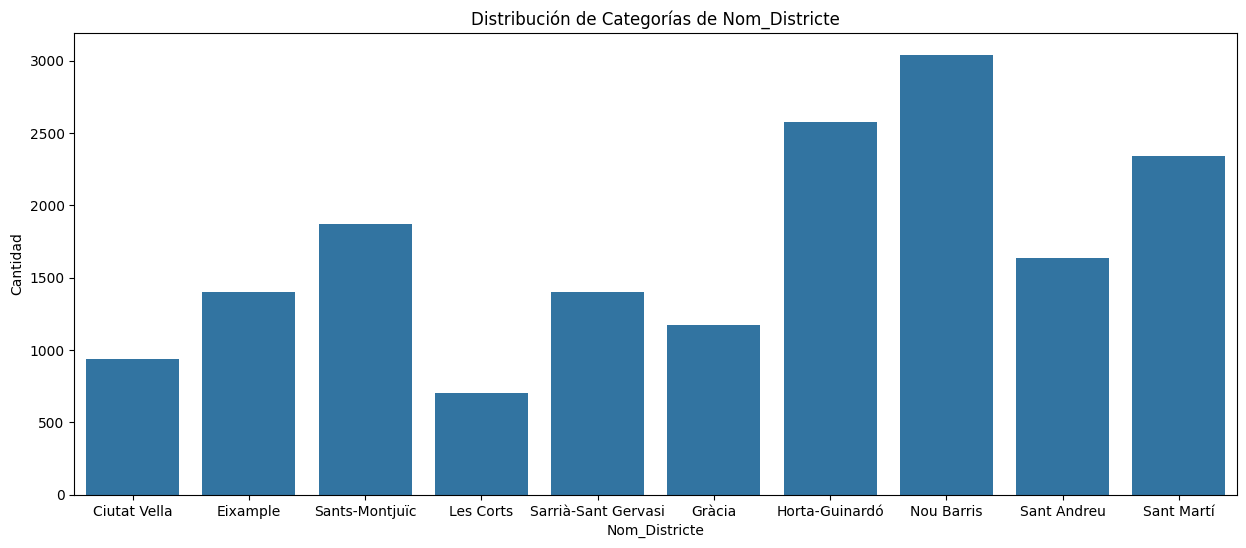

In [7]:
# Visualizamos la distribución de la variable categórica Nom_Districte utilizando un gráfico de barras
plt.figure(figsize=(15, 6))
sns.countplot(x='Nom_Districte', data=df_final)
plt.title('Distribución de Categorías de Nom_Districte')
plt.xlabel('Nom_Districte')
plt.ylabel('Cantidad')
plt.show()

Las diferencias entre cantidad entre distritos corresponde a la cantidad de barrios que contiene cada distrito.

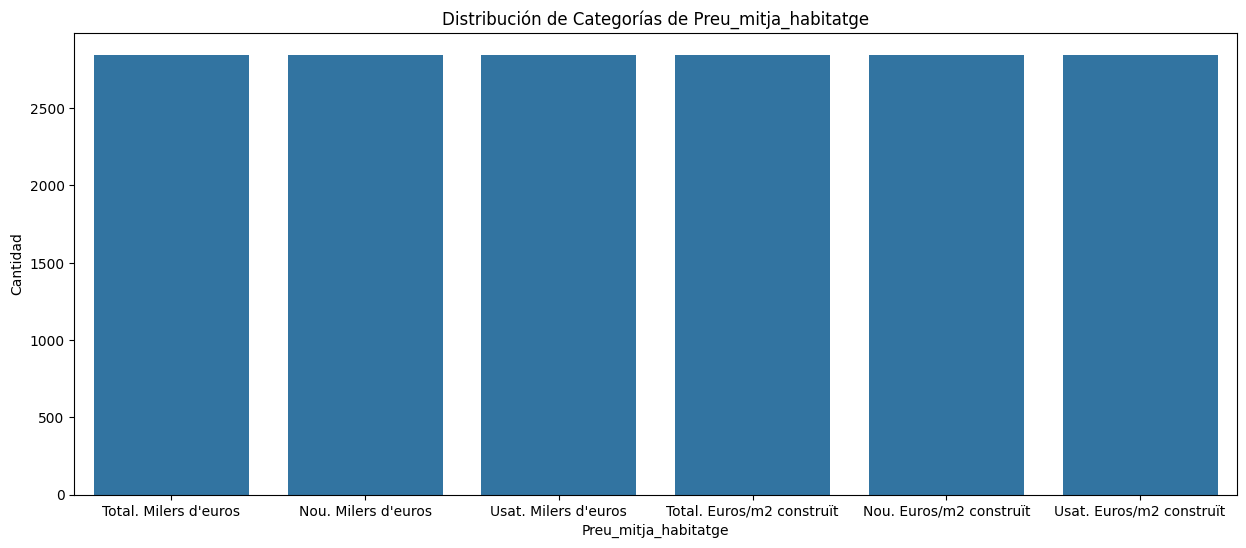

In [8]:
# Visualizamos la distribución de la variable categórica Nom_Districte utilizando un gráfico de barras
plt.figure(figsize=(15, 6))
sns.countplot(x='Preu_mitja_habitatge', data=df_final)
plt.title('Distribución de Categorías de Preu_mitja_habitatge')
plt.xlabel('Preu_mitja_habitatge')
plt.ylabel('Cantidad')
plt.show()

El objetivo del TFM esa basado en el valor de compraventa unitario (€/m²) sin entrar a diferenciar entre vivienda nueva o usada, que podria ser objetivo de otro estudio.

Por este motivo, en el apartado de Limpieza de datos, filtraremos el dataframe para obtener solo los datos referentes a  y "Total. Euros/m2 construït".

## Limpieza de datos

Verificamos que si hay datos faltantes

In [9]:
df_final.isnull().sum()

Any                        0
Trimestre                  0
Codi_Districte             0
Nom_Districte              0
Codi_Barri                 0
Nom_Barri                  0
Preu_mitja_habitatge       0
Valor                   3303
dtype: int64

In [10]:
# Utilizamos isna() para encontrar los NaN
filas_con_nan = df_final[df_final.isna().any(axis=1)]

# Muestra las filas que contienen NaN
print(filas_con_nan)

        Any  Trimestre  Codi_Districte   Nom_Districte  Codi_Barri  \
3544   2020          1               7  Horta-Guinardó          42   
3556   2020          1               8      Nou Barris          54   
3558   2020          1               8      Nou Barris          56   
3576   2020          1               1    Ciutat Vella           1   
3581   2020          1               2        Eixample           6   
...     ...        ...             ...             ...         ...   
15735  2014          4               7  Horta-Guinardó          42   
15740  2014          4               8      Nou Barris          47   
15747  2014          4               8      Nou Barris          54   
15749  2014          4               8      Nou Barris          56   
15751  2014          4               9     Sant Andreu          58   

                Nom_Barri      Preu_mitja_habitatge Valor  
3544             la Clota     Total. Milers d'euros   NaN  
3556           Torre Baró     Total. Mi

Se observan 3303 filas con valores perdidos. Tal como se describe en las observaciones del dataset, corresponde a barrios donde no se han producido un minimo de 2 compraventas. Antes de ver como abordamos los valores NaN, deberemos de:
1. Explorar la variable Preu_mitja_habitatge y obtener solo aquellos datos que nos interesen
2. Comprobar y decidir que hacer con los valores NaN

### Exploracion de la variable Preu_mitja_habitatge

In [11]:
# Obtenemos los valores unicos  de la variable Preu_mitja_habitatge
valores_unicos = df_final['Preu_mitja_habitatge'].unique()

# Mostrsmos los diferentes valores únicos
print(valores_unicos)

["Total. Milers d'euros" "Nou. Milers d'euros" "Usat. Milers d'euros"
 'Total. Euros/m2 construït' 'Nou. Euros/m2 construït'
 'Usat. Euros/m2 construït']


In [12]:
# Filtrar el dataFrame por Total. Euros/m2 construït
df_filtrado = df_final[(df_final['Preu_mitja_habitatge'] == "Total. Euros/m2 construït")]

# Modificamos nombre de la variable valor
df_filtrado = df_filtrado.rename(columns={'Valor': 'Compraventa_Unitario'})

# Modificamos nombre de la variable valor
df_filtrado = df_filtrado.drop(columns=['Preu_mitja_habitatge'])

df_filtrado.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compraventa_Unitario
219,2022,1,1,Ciutat Vella,1,el Raval,3203.0
220,2022,1,1,Ciutat Vella,2,el Barri Gòtic,4755.7
221,2022,1,1,Ciutat Vella,3,la Barceloneta,4489.8
222,2022,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",4739.0
223,2022,1,2,Eixample,5,el Fort Pienc,4175.4


Ya tenemos unicamente las filas correspondientes al valor de compraventa unitario (€/m²)

### Comprobar y decidir que hacer con los valores NaN

En este punto volveremos a analizar si existen valores NaN en el dataframe

In [13]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2847 entries, 219 to 16934
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Any                   2847 non-null   int64 
 1   Trimestre             2847 non-null   int64 
 2   Codi_Districte        2847 non-null   int64 
 3   Nom_Districte         2847 non-null   object
 4   Codi_Barri            2847 non-null   int64 
 5   Nom_Barri             2847 non-null   object
 6   Compraventa_Unitario  2707 non-null   object
dtypes: int64(4), object(3)
memory usage: 177.9+ KB


In [14]:
# Utilizamos isna() para encontrar los NaN
filas_con_nan = df_filtrado[df_filtrado.isna().any(axis=1)]

# Muestra las filas que contienen NaN
filas_con_nan

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compraventa_Unitario
3763,2020,1,7,Horta-Guinardó,42,la Clota,NaN
3775,2020,1,8,Nou Barris,54,Torre Baró,NaN
3777,2020,1,8,Nou Barris,56,Vallbona,NaN
4201,2020,2,7,Horta-Guinardó,42,la Clota,NaN
4206,2020,2,8,Nou Barris,47,Can Peguera,NaN
...,...,...,...,...,...,...,...
15588,2014,4,7,Horta-Guinardó,41,la Vall d'Hebron,NaN
15594,2014,4,8,Nou Barris,47,Can Peguera,NaN
15601,2014,4,8,Nou Barris,54,Torre Baró,NaN
15603,2014,4,8,Nou Barris,56,Vallbona,NaN


Como se puede ver, siguen habiendo valores faltantes en 140 filas del dataframe.

A los valores faltantes imputaremos el valor medio entre el valor anterior y el posterior. Para ellos primero ordenaremos los datos

In [15]:
# Creamos un DataFrame que contiene todas las combinaciones posibles de año, trimestre y mes
combinaciones = []
for año in df_filtrado['Any'].unique():
    for trimestre in df_filtrado['Trimestre'].unique():
        for mes in range(trimestre * 3 - 2, trimestre * 3 + 1):
            combinaciones.append((año, trimestre, mes))

# Convertimos la lista de combinaciones en un DataFrame
df_completo = pd.DataFrame(combinaciones, columns=['Any', 'Trimestre', 'Mes'])

# Combinamos el DataFrame completo con el DataFrame original
df_completo = pd.merge(df_completo, df_filtrado, on=['Any', 'Trimestre'], how='left')

# Ordenamos el DataFrame resultante
df_completo.sort_values(by=['Any', 'Trimestre', 'Mes'], inplace=True)

# Rellenamos los valores faltantes con los valores del trimestre correspondiente
df_completo['Compraventa_Unitario'].fillna(method='ffill', inplace=True)  # Propagación hacia adelante

# Eliminamos las filas con valores nulos
df_completo = df_completo.dropna()

# Modificamos el tipo de dato
df_completo['Codi_Districte'] = df_completo['Codi_Districte'].astype(int)
df_completo['Codi_Barri'] = df_completo['Codi_Barri'].astype(int)

df_completo.head()

,Any,Trimestre,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compraventa_Unitario
7008,2014,1,1,1,Ciutat Vella,1,el Raval,2813.0
7009,2014,1,1,1,Ciutat Vella,2,el Barri Gòtic,4152.9
7010,2014,1,1,1,Ciutat Vella,3,la Barceloneta,3927.2
7011,2014,1,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",3979.2
7012,2014,1,1,2,Eixample,5,el Fort Pienc,3443.1


In [16]:
df_completo['fecha']=pd.to_datetime(df_completo['Any'].astype(str) + '-' + df_completo['Mes'].astype(str)+'-01', format='%Y-%m-%d')

In [17]:
# Ordenamos las filas segun los criterios correspondientes.
df_ordenado = df_completo.sort_values(by=['Codi_Barri','fecha'], ascending=[True, True])

In [18]:
df_ordenado = df_ordenado.reset_index(drop=True)

In [19]:
df_ordenado['Compraventa_Unitario'] = df_ordenado['Compraventa_Unitario'].replace('--', np.nan)

In [20]:
df_ordenado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8541 entries, 0 to 8540
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Any                   8541 non-null   int64         
 1   Trimestre             8541 non-null   int64         
 2   Mes                   8541 non-null   int64         
 3   Codi_Districte        8541 non-null   int64         
 4   Nom_Districte         8541 non-null   object        
 5   Codi_Barri            8541 non-null   int64         
 6   Nom_Barri             8541 non-null   object        
 7   Compraventa_Unitario  8385 non-null   object        
 8   fecha                 8541 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 600.7+ KB


In [21]:
df_ordenado.set_index('fecha', inplace=True)

In [22]:
df_ordenado.head()

,Any,Trimestre,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compraventa_Unitario
fecha,,,,,,,,
2014-01-01,2014,1,1,1,Ciutat Vella,1,el Raval,2813.0
2014-02-01,2014,1,2,1,Ciutat Vella,1,el Raval,2813.0
2014-03-01,2014,1,3,1,Ciutat Vella,1,el Raval,2813.0
2014-04-01,2014,2,4,1,Ciutat Vella,1,el Raval,2948.8
2014-05-01,2014,2,5,1,Ciutat Vella,1,el Raval,2948.8


In [23]:
# Para manejar errores de conversión utilizaremos 'errors='coerce''
df_ordenado['Compraventa_Unitario'] = pd.to_numeric(df_ordenado['Compraventa_Unitario'], errors='coerce')

# Convertimos la columna a tipo float
df_ordenado['Compraventa_Unitario'] = df_ordenado['Compraventa_Unitario'].astype(float)

# Verificamos el cambio de tipo de dato
print(df_ordenado.dtypes)

Any                       int64
Trimestre                 int64
Mes                       int64
Codi_Districte            int64
Nom_Districte            object
Codi_Barri                int64
Nom_Barri                object
Compraventa_Unitario    float64
dtype: object


In [24]:
# Imputar los valores NaN basados en la zona geográfica
df_interpolado = df_ordenado.groupby('Codi_Barri').apply(lambda group: group.interpolate(method='time'))

In [25]:
df_interpolado.head()

Any  Trimestre  Mes  Codi_Districte Nom_Districte  \
Codi_Barri fecha                                                            
1          2014-01-01  2014          1    1               1  Ciutat Vella   
           2014-02-01  2014          1    2               1  Ciutat Vella   
           2014-03-01  2014          1    3               1  Ciutat Vella   
           2014-04-01  2014          2    4               1  Ciutat Vella   
           2014-05-01  2014          2    5               1  Ciutat Vella   

                       Codi_Barri Nom_Barri  Compraventa_Unitario  
Codi_Barri fecha                                                   
1          2014-01-01           1  el Raval                2813.0  
           2014-02-01           1  el Raval                2813.0  
           2014-03-01           1  el Raval                2813.0  
           2014-04-01           1  el Raval                2948.8  
           2014-05-01           1  el Raval                2948.8

In [26]:
df_interpolado = df_interpolado.reset_index(drop=True)

In [27]:
df_interpolado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8541 entries, 0 to 8540
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Any                   8541 non-null   int64  
 1   Trimestre             8541 non-null   int64  
 2   Mes                   8541 non-null   int64  
 3   Codi_Districte        8541 non-null   int64  
 4   Nom_Districte         8541 non-null   object 
 5   Codi_Barri            8541 non-null   int64  
 6   Nom_Barri             8541 non-null   object 
 7   Compraventa_Unitario  8541 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 533.9+ KB


In [28]:
# Analizamos las variables numericas
df_interpolado.describe()

,Any,Trimestre,Mes,Codi_Districte,Codi_Barri,Compraventa_Unitario
count,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000,8541.000000
mean,2018.384615,2.461538,6.384615,6.246575,37.000000,3369.073395
std,2.816012,1.105904,3.416716,2.788499,21.072541,1275.046153
min,2014.000000,1.000000,1.000000,1.000000,1.000000,217.200000
25%,2016.000000,1.000000,3.000000,4.000000,19.000000,2382.500000
50%,2018.000000,2.000000,6.000000,7.000000,37.000000,3307.800000
75%,2021.000000,3.000000,9.000000,8.000000,55.000000,4208.800000
max,2023.000000,4.000000,12.000000,10.000000,73.000000,10961.200000


## Creación de .csv

Obtenemos el archivo datosParo.csv con los datos del dataframe resultante

In [29]:
# Guardar el DataFrame en un archivo CSV
df_interpolado.to_csv('/content/drive/MyDrive/UOC/TFM/Datasets definitivos/datos_RES_Compraventa.csv', index=False)

## Análisis Exploratorio de Datos (EDA)

Una vez tenemos los datos limpios continuamos con la exploracion inicial de los datos

### Variable continua Compraventa Unitario (Compraventa_Unitario)

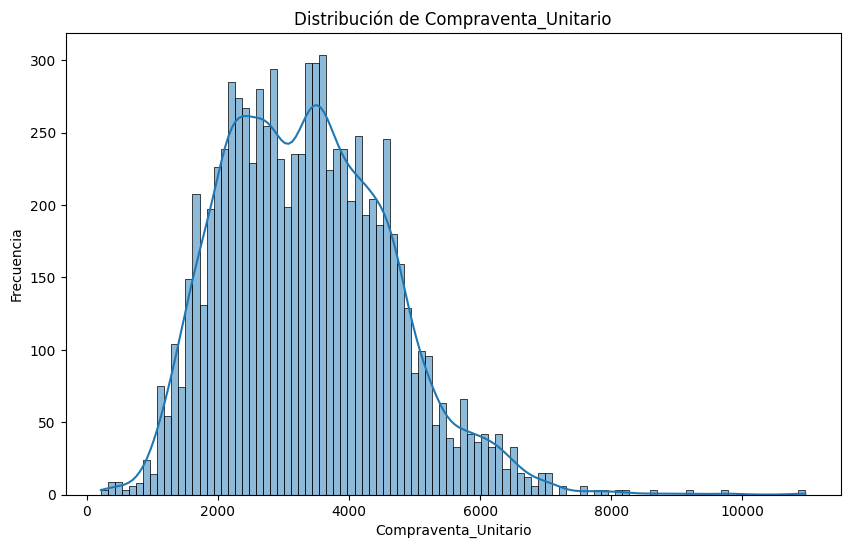

In [30]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_interpolado['Compraventa_Unitario'], bins=100, kde=True)
plt.title('Distribución de Compraventa_Unitario')
plt.xlabel('Compraventa_Unitario')
plt.ylabel('Frecuencia')
plt.show()

In [31]:
# Agrupamos la variable continua ParadosReg en función de los años
df_compraventaUnitario = df_interpolado.groupby(['Any','Codi_Districte','Nom_Districte'])['Compraventa_Unitario'].mean().reset_index()

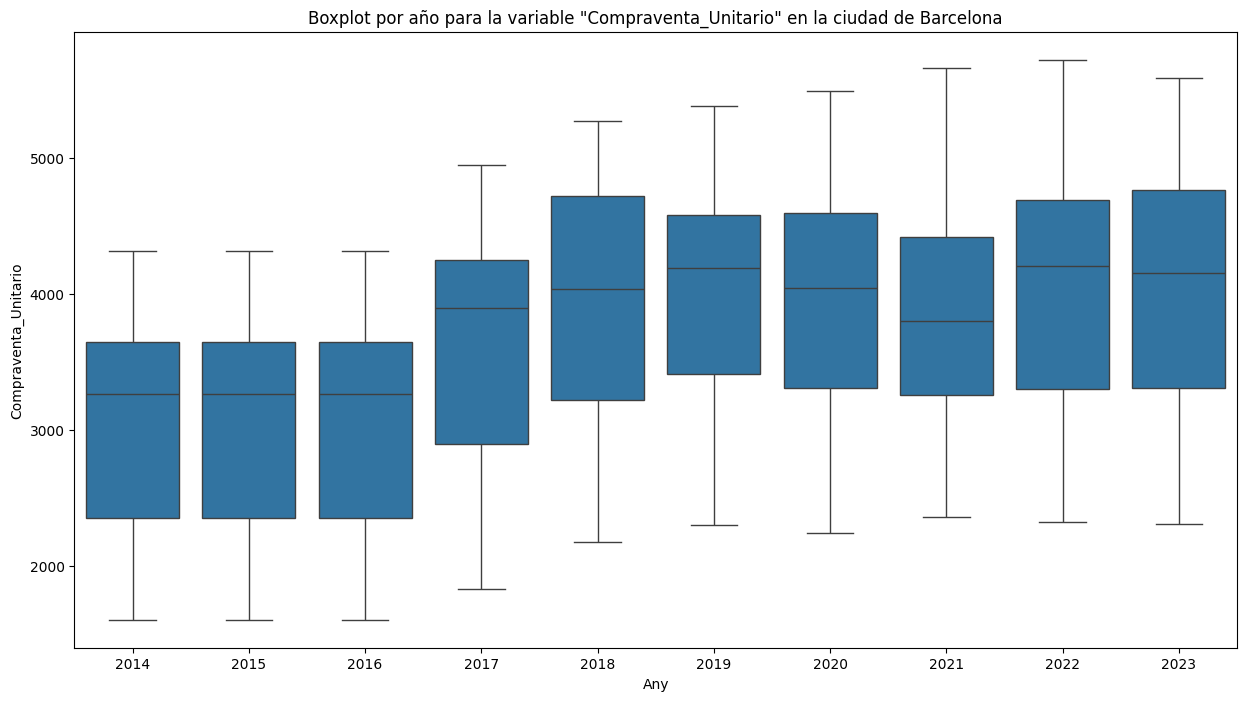

In [32]:
# Crear diagrama de caja para la variable continua NoParados en funcion de la variable categorica "Any"
plt.figure(figsize=(15, 8))
sns.boxplot(x='Any', y='Compraventa_Unitario', data=df_compraventaUnitario)
plt.title('Boxplot por año para la variable "Compraventa_Unitario" en la ciudad de Barcelona')

# Mostrar el diagrama de caja
plt.show()

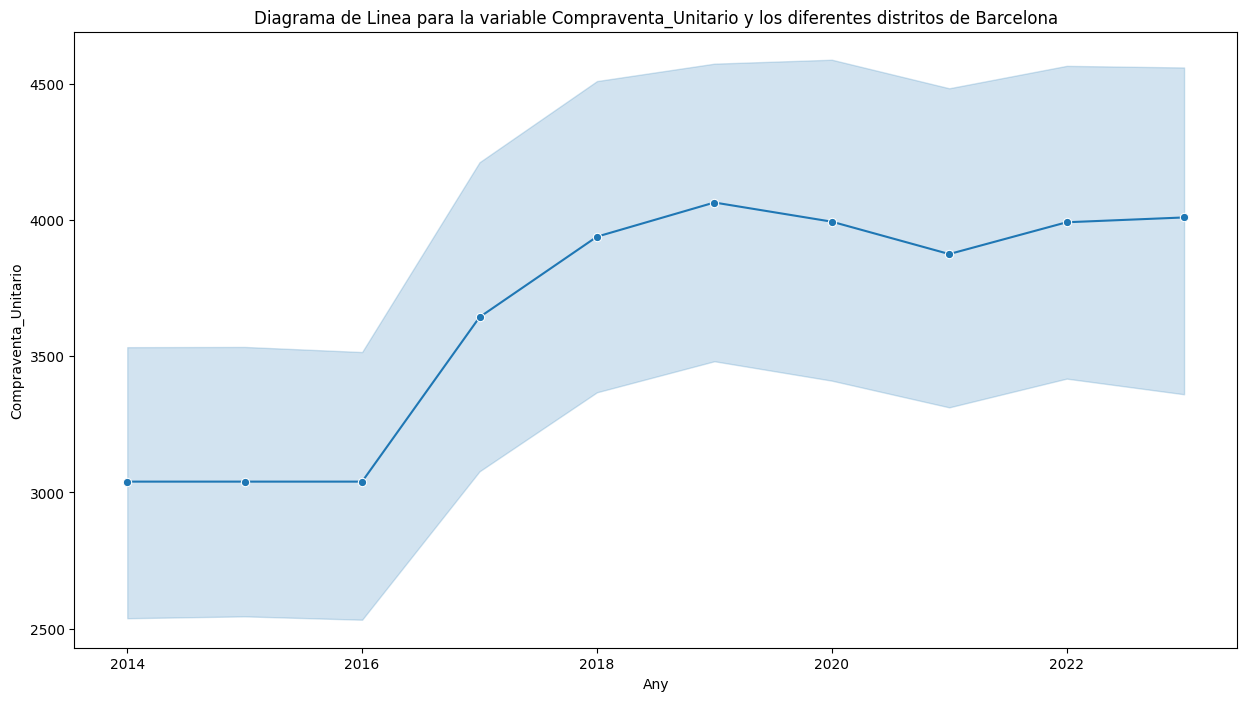

In [33]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_compraventaUnitario, x='Any', y='Compraventa_Unitario', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Compraventa_Unitario y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('Compraventa_Unitario')

plt.show()

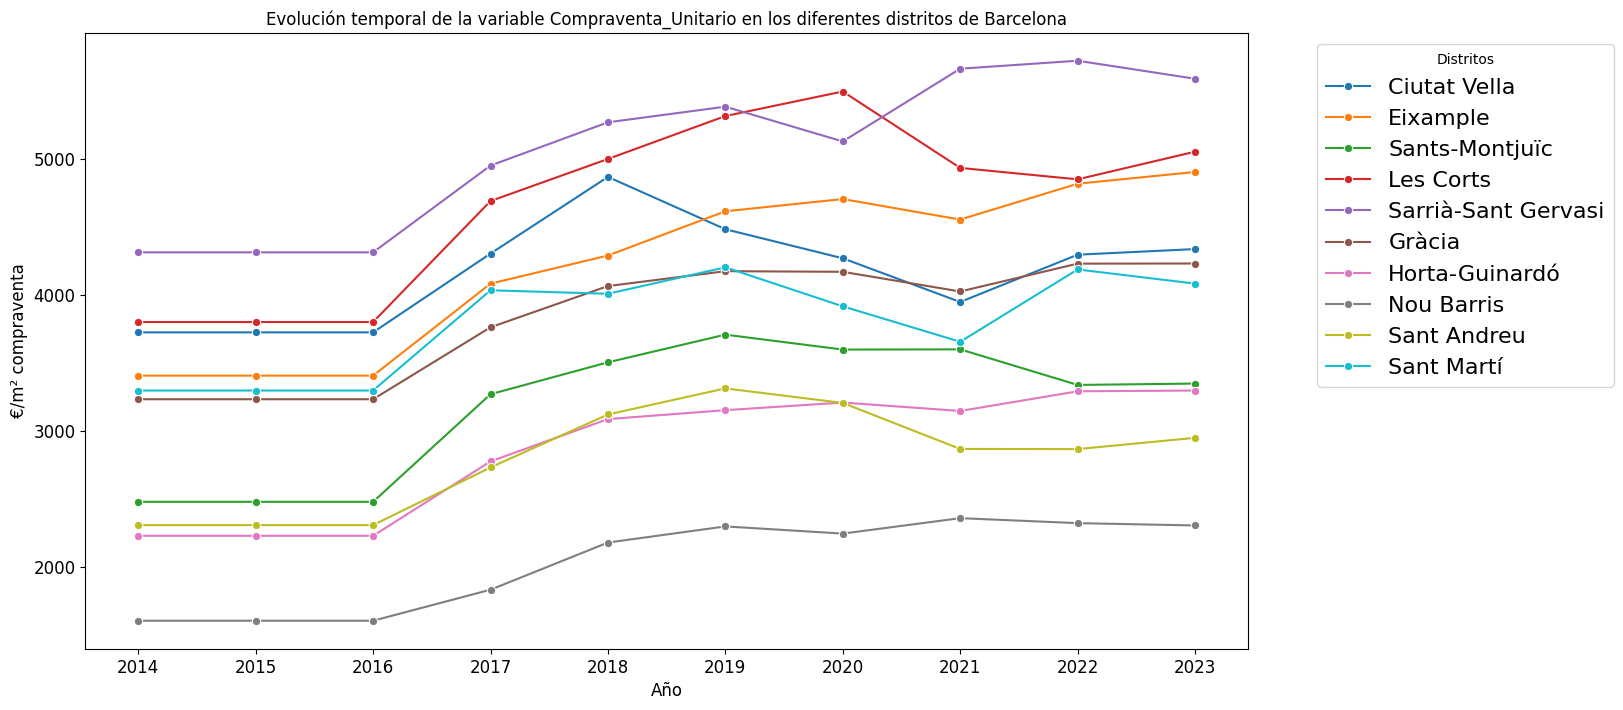

In [34]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))


sns.lineplot(data=df_compraventaUnitario, x='Any', y='Compraventa_Unitario', hue='Nom_Districte', marker='o')# Graficar los valores de la variable continua
plt.title('Evolución temporal de la variable Compraventa_Unitario en los diferentes distritos de Barcelona')
plt.xlabel('Año', fontsize=12)
plt.ylabel('€/m² compraventa', fontsize=12)
plt.legend(title='Distritos', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
plt.xticks(df_compraventaUnitario['Any'].unique(), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## Carga del Shapefile

Cargamos el archivo tipo shape con los 10 distritos de Barcelona

In [35]:
# Cargar el archivo shapefile de los distritos de Barcelona
barcelona_distritos = gpd.read_file("/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Grafo viario de las calles de la ciudad de Barcelona/BCN_UNITATS_ADM/0301040100_Districtes_UNITATS_ADM.shp")

# Mostrar información básica sobre el shapefile
print("Información del shapefile:")
barcelona_distritos.head()


Información del shapefile:


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID_V,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((431733.736 4582441.816, 431827.673 4..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432033.184 4583665.032, 432032.069 4..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((428773.911 4580873.742, 428833..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((425054.670 4583672.560, 425062.830 4..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((422563.071 4587486.743, 422568..."


In [36]:
# Convertimos el tipo de valor de la variable distrito a entero
barcelona_distritos['DISTRICTE'] = barcelona_distritos['DISTRICTE'].astype(int)

In [37]:
df_compraventaUnitario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Any                   100 non-null    int64  
 1   Codi_Districte        100 non-null    int64  
 2   Nom_Districte         100 non-null    object 
 3   Compraventa_Unitario  100 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


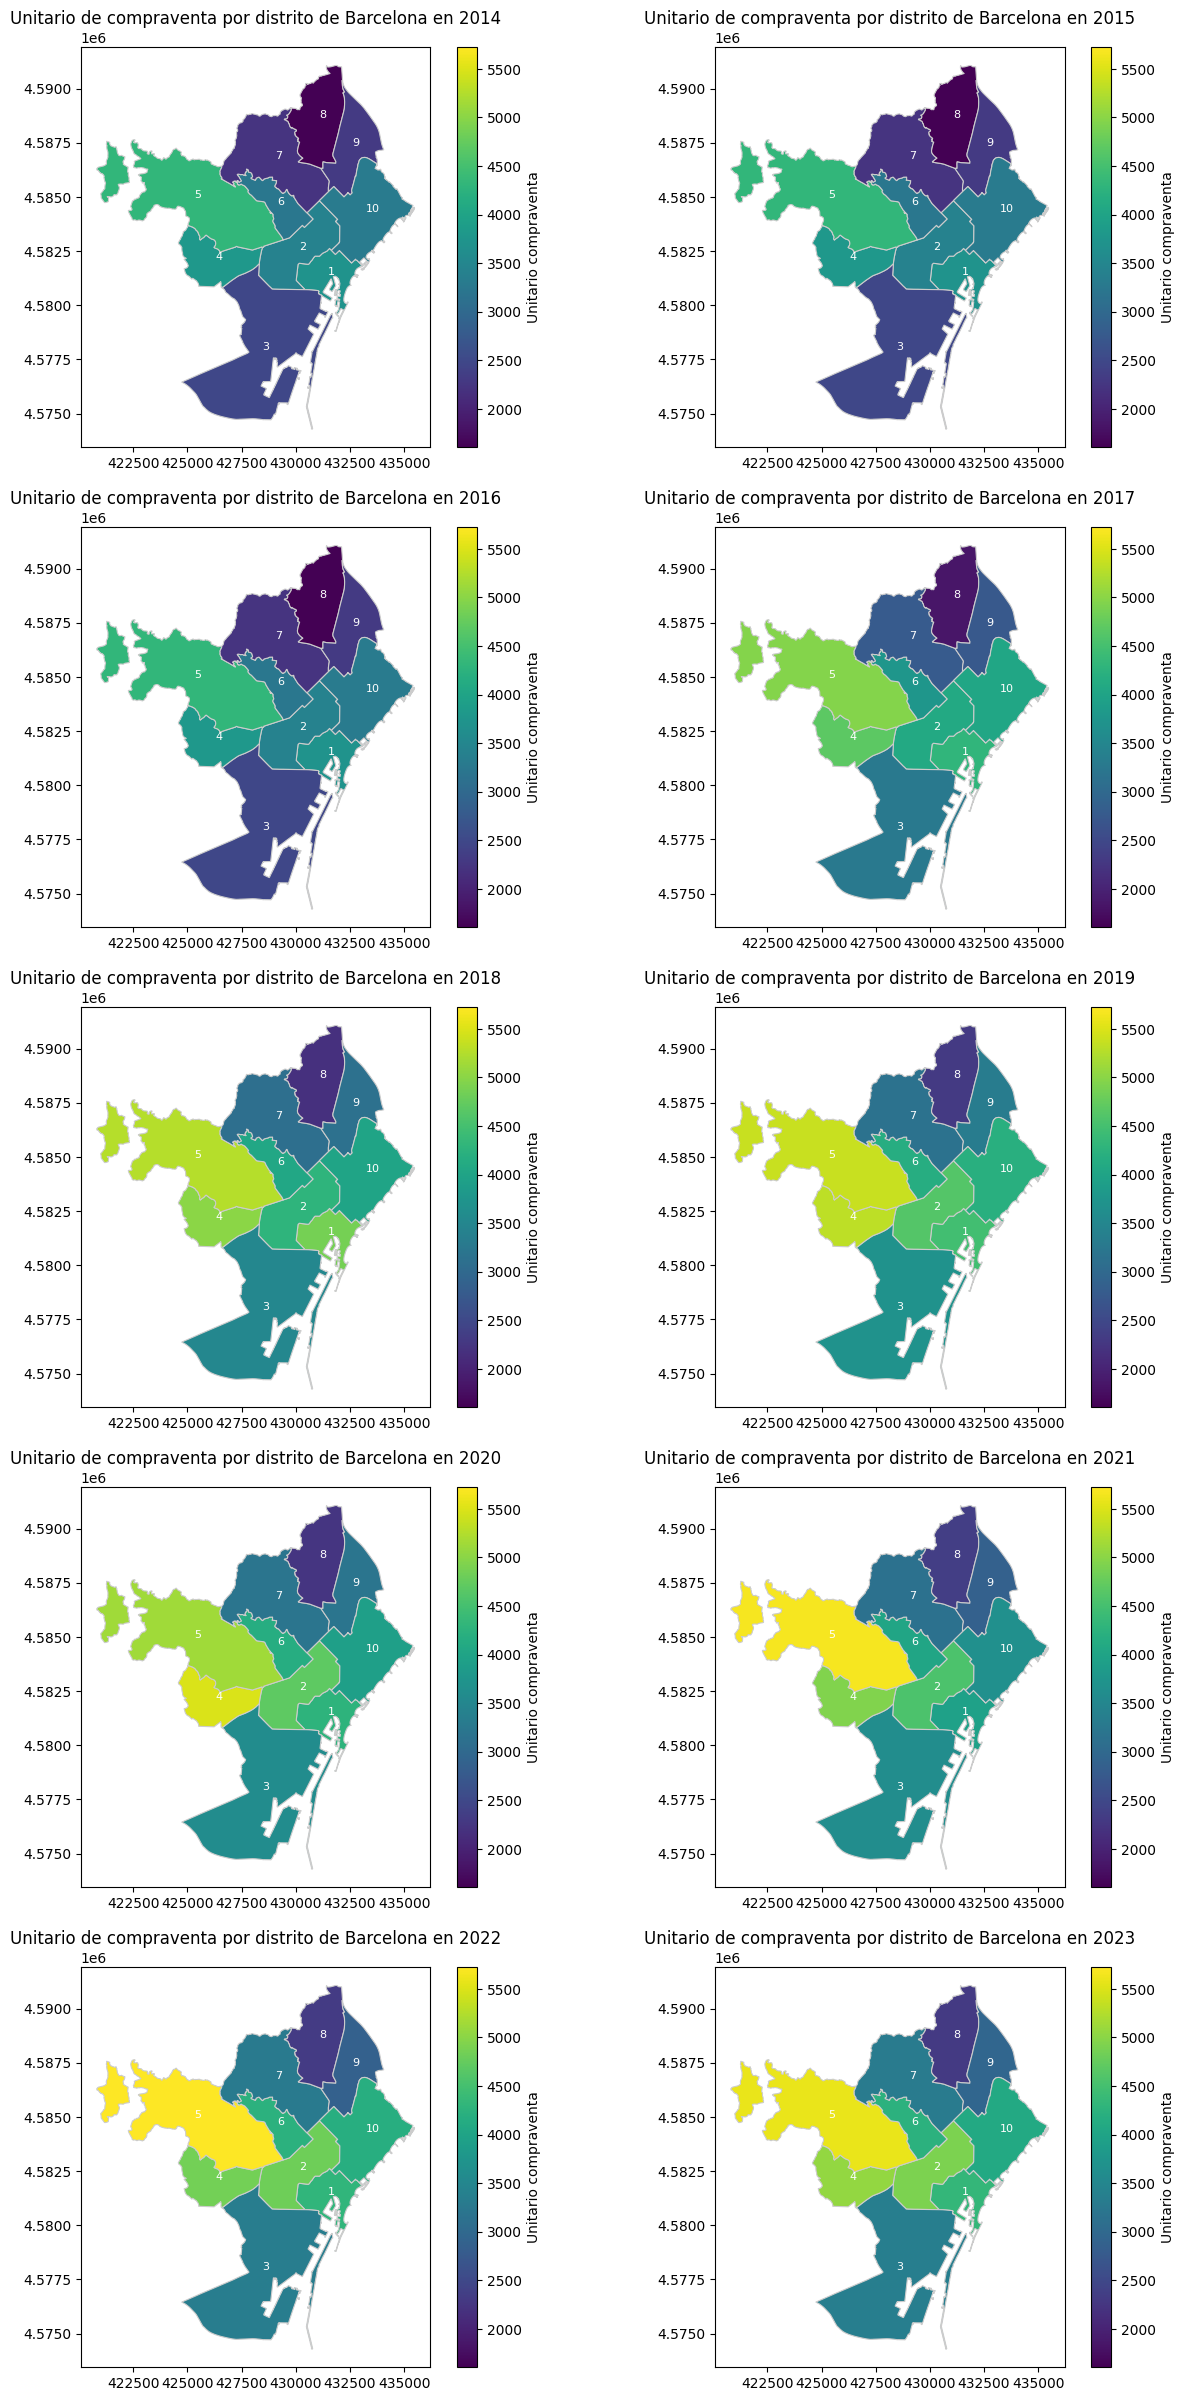

In [38]:
# Suprimir todas las advertencias
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 80))

# Definir el valor máximo y mínimo global
max_global = df_compraventaUnitario['Compraventa_Unitario'].max()
min_global = df_compraventaUnitario['Compraventa_Unitario'].min()

# Crear un colormap Viridis basado en el rango global de valores de contaminación
viridis_cmap = viridis

# Iterar sobre cada año para crear un gráfico para cada uno
for i, year in enumerate(df_compraventaUnitario['Any'].unique(), start=1):

    plt.subplot(13, 2, i)
    # Filtrar los datos para el año actual
    datos_year = df_compraventaUnitario[df_compraventaUnitario['Any'] == year]

    # Combinar los datos con el shapefile
    distritos_year = barcelona_distritos.merge(datos_year, how='left', left_on='DISTRICTE', right_on='Codi_Districte') # Combinar datos CSV y Shapefile

    # Añadir los nombres de los distritos
    for idx, row in barcelona_distritos.iterrows():
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['DISTRICTE'], fontsize=8,color='white')

    # Crear el mapa de los distritos de Barcelona en el año actual con colores
    plt.title(f"Unitario de compraventa por distrito de Barcelona en {year}")

    distritos_year.plot(ax=plt.gca(),column='Compraventa_Unitario', cmap=viridis_cmap, linewidth=0.8, edgecolor='0.8',
                        norm=plt.Normalize(vmin=min_global, vmax=max_global))

    # Añadir una barra de color para mostrar la escala
    sm = plt.cm.ScalarMappable(cmap=viridis_cmap, norm=plt.Normalize(vmin=min_global, vmax=max_global))
    sm._A = []
    # Crear la leyenda con un gradiente de color
    cbar = plt.colorbar(sm, ax=plt.gca())
    cbar.set_label('Unitario compraventa')  # Establece el nombre de la variable

